The notebook is divided into two parts: in the first one the data is read from the txt file and fed to a simple classifier, in the second part the importance of features is analysed.

# The classifier

## Preprocessing

That's for Google Colab. Skip this if you run the code from your local machine

In [65]:
# Do not launch this if you use your local machine instead of Google Colab!

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/'Colab Notebooks'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks
 4-DTFT.ipynb
 4_DTFT_norm.ipynb
'Copy of Pochernyaeva1.ipynb'
'cyber_security_fixed_power (1).ipynb'
 cyber_security_fixed_power.ipynb
 DTFT2_lab.ipynb
 featureImp2.JPEG
 featureImp.JPEG
 Lab1_part1_differentiation.ipynb
 Lab1_part2_ml_pipeline.ipynb
 lime
 Lime_analysis_63_conf.ipynb
 Lime_analysis_new.ipynb
 Pochernyaeva1.ipynb
 Shimovolos_1.ipynb
'Submodular Pick examples.ipynb'
 TXID_Dataset_diff_power_and_angle.txt
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
'Копия блокнота "cyber_security_fixed_power.ipynb"'


N. B.! If you run the notebook on the local machine, place the .txt dataset in the same folder where the notebook is.

In [66]:
import pandas as pd

colnames = ["P1","P2","P3" ,"P4","P5","P6","P7","P8","P9","P10","y" ]

#reading the text file (dataset)
data = pd.read_csv('TXID_Dataset_diff_power_and_angle.txt', sep=",", names=colnames, header=None, index_col=False )
data.loc[data['y'] == 2, 'y'] = 0

In [67]:
#some stats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      30000 non-null  float64
 1   P2      30000 non-null  float64
 2   P3      30000 non-null  float64
 3   P4      30000 non-null  float64
 4   P5      30000 non-null  float64
 5   P6      30000 non-null  int64  
 6   P7      30000 non-null  float64
 7   P8      30000 non-null  float64
 8   P9      30000 non-null  float64
 9   P10     30000 non-null  float64
 10  y       30000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 2.5 MB


In [68]:
# the matrix (table) with features
X = data[["P1","P2","P3" ,"P4","P5","P6","P7","P8","P9","P10"]].values

# the labels, showing the class (0 or 1) of the corresponding line in table X
y = data["y"].values

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

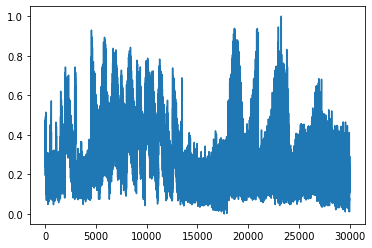

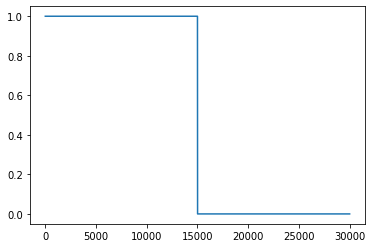

In [70]:
# let's have a look on the data!
import matplotlib.pyplot as plt

# the first feature (you may look at the others as well)
plt.plot(X[:, 7])
plt.show()

# and the class label
plt.plot(y)
plt.show()

In [71]:
# let's divide the data into train and test parts!
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)

#the dataset is shuffled and 30% of it is left for testing
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(30000, 10) (21000, 10) (9000, 10)
(30000,) (21000,) (9000,)


## Training the model

In [72]:
# let's start with one of the basic classifiers
from sklearn.tree import DecisionTreeClassifier

# creating an "empty" classifier, coefficients are not trained!
DT_classifier = DecisionTreeClassifier(random_state=1337)

# training the model: finding the optimal coefs based on the train data
DT_classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1337, splitter='best')

## Evaluating the performance

In [73]:
# the coefs are changed, the model is trained, let's see how good the model works on data it has not seen
y_pred = DT_classifier.predict(X_test)

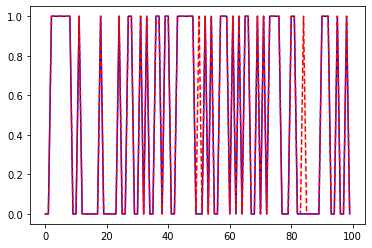

In [74]:
# let's have a look on 100 predictions and ground-truth (known) test labels
plt.plot(y_test[100:200], "b") # correct labels will be blue
plt.plot(y_pred[100:200], "r--") # predictions will be red

In [75]:
# there are some mistakes, our model is not perfect, what a pity...
# let' calculate the accuracy
# accuracy = number of correct predictions / number of all predictions
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9823333333333333


Quite impressive, but it is not 1, so there were some mistakes

# Feature importance analysis

## Decision-tree coefs

In this section we'll have a look at feature importance calculation in Decision Trees. It is the most common and easiest way to analyse feature importance.

In [76]:
# Training the model again...

model = DecisionTreeClassifier(random_state=1488)

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1488, splitter='best')

In [77]:
y_pred = model.predict(X_test)

In [78]:
importances = model.feature_importances_ # that is the array of feature importances
print(importances)


[0.00230046 0.00229069 0.00283457 0.32854823 0.00396876 0.50251621
 0.02615963 0.11992107 0.00863146 0.00282892]


In every node the dataset is split into two parts based on the value of one feature. 
In ideal case, there shall be only one node separating all instances of class 0 in left split and all instances of class 1 in right split.
That is usually not true, classes are often mixed in every split.
Enthropy is the measure of how good the node separtes two classes.

To calculate the importance of feature P1 we:
1. take all the nodes which split based on feature P1
2. Count the probability of reaching that node (number of samples in the node / all samples)
3. Multiply the propbabilities by corresponding entropy values
4. Sum up and get the feature importance.

In [79]:
#some magic to present it in a cool way
feature_results = pd.DataFrame({'feature': ["P1","P2","P3" ,"P4","P5","P6","P7","P8","P9","P10"], 
                                'importance': importances})

feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

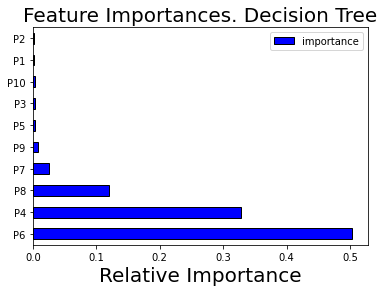

In [80]:
# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances. Decision Tree', size = 20);

#plt.savefig("featureImp.jpeg", dpi=400, transparent=True, bbox_inches='tight')

## LIME

### Repeating what was done in the article by Nigmatullin et. al.

Now let's get strait to the LIME

In [81]:
! git clone https://github.com/marcotcr/lime.git

fatal: destination path 'lime' already exists and is not an empty directory.


In [82]:
%cd lime/
!ls

/content/gdrive/My Drive/Colab Notebooks/lime
benchmark  citation.bib     doc      lime	  README.md  setup.py
binder	   CONTRIBUTING.md  LICENSE  MANIFEST.in  setup.cfg


In [83]:
pip install .

Processing /content/gdrive/My Drive/Colab Notebooks/lime
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=560278 sha256=71d3963d729a1023d16c273aef47c103db8cb46c08d8dee3d316da1b01f5a185
  Stored in directory: /tmp/pip-ephem-wheel-cache-ajaft7aj/wheels/10/83/89/c968785b30d3d32c0904d68b22356643dfad46244b1948db14
Successfully built lime
  Found existing installation: lime 0.2.0.1
    Uninstalling lime-0.2.0.1:
      Successfully uninstalled lime-0.2.0.1


Creating a new model

In [84]:
%cd /content/gdrive/My\ Drive/'Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [85]:
import pandas as pd

colnames = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","y"]
numerical_subset = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10"]

#reading the text file (dataset)
data = pd.read_csv('TXID_Dataset_diff_power_and_angle.txt', sep=",", names=colnames, header=None, index_col=False )

data.loc[data['y'] == 2, 'y'] = 0
X = data[numerical_subset]
y = data["y"]

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [87]:
# let's divide the data into train and test parts!
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size = 0.3, random_state = 42, shuffle=True)

#the dataset is shuffled and 30% of it is left for testing
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(30000, 10) (21000, 10) (9000, 10)
(30000,) (21000,) (9000,)


In [88]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_train, y_train)

# N.B. we get probabilities to be in a certain class here, not just the class labels!    
y_pred = model.predict(X_test)
y_pred_proba = np.array(model.predict_proba(X_test))

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9902222222222222


Creating LIME explainer

In [90]:
import lime 
import lime.lime_tabular
import numpy as np

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train, 
                                                   mode = 'classification',
                                                   training_labels = y_train,
                                                   feature_names = ["P1","P2","P3" ,"P4","P5","P6","P7","P8","P9","P10"])

Using propabilities we can select the best (most certain) and the worst (where the probability differs from the 0 or 1 the most) prediction

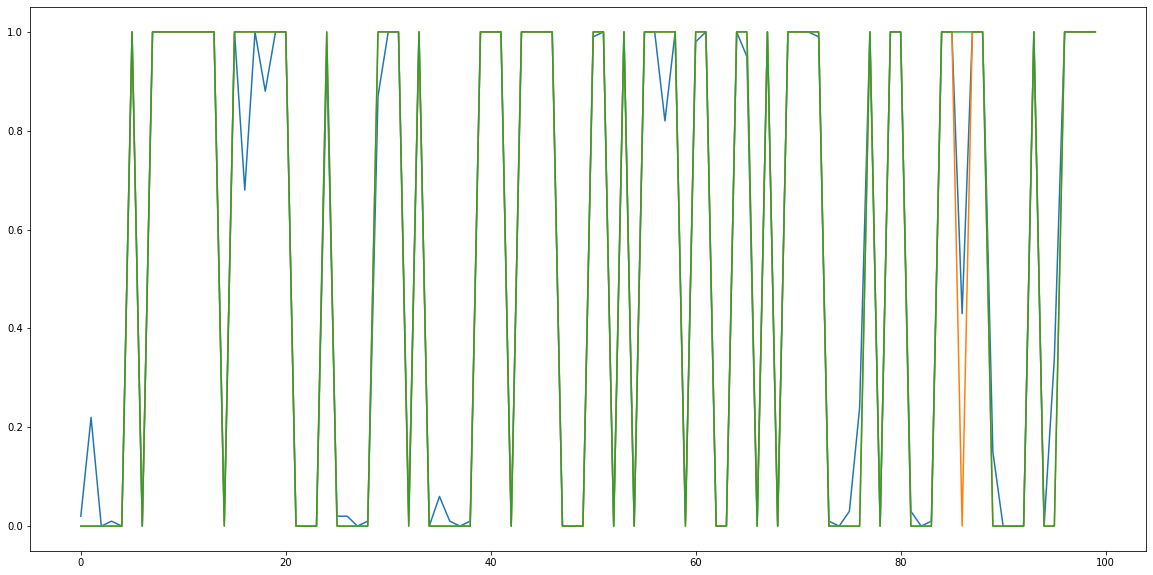

In [91]:
plt.figure(figsize=(20, 10))

plt.plot(y_pred_proba[300:400, 1]) # blue is the probability to be an instance of class 1
plt.plot(y_pred[300:400]) # orange is the decision class 0 or 1
plt.plot(y_test[300:400]) # green is the true class label

In [92]:
# Find the residuals
# residuals is the propabilistic measure of model incorrect prediction
residuals = np.zeros(len(y_test))
for i in range (len(y_test)):
    if (y_test[i] == 0) and (y_pred_proba[i][0]>=0.5):
        residuals[i] = y_pred_proba[i][1]
    if (y_test[i] == 1) and (y_pred_proba[i][1]>=0.5):
        residuals[i] = y_pred_proba[i][0]
        
    if (y_test[i] == 0) and (y_pred_proba[i][1]<0.5):
        residuals[i] = y_pred_proba[i][1]
    if (y_test[i] == 1) and (y_pred_proba[i][1]<0.5):
        residuals[i] = y_pred_proba[i][0]
    
# Find the worst and best prediction
wrong = X_test[np.argmax(residuals), :]
right = X_test[np.argmin(residuals), :]

print("The first most correct prediction is at " + str(np.argmin(residuals)))
print("The first least correct prediction is at " + str(np.argmax(residuals)))

The first most correct prediction is at 0
The first least correct prediction is at 7051


Prediction: 0.0000
Actual Value: 1.0000


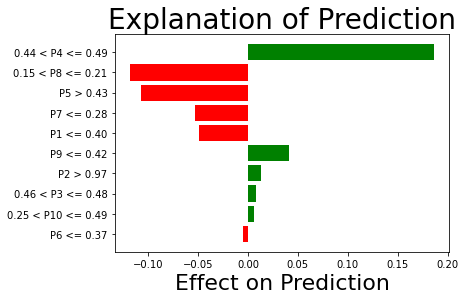

In [93]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model.predict_proba)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

plt.savefig("featureImp.JPEG", dpi=400, transparent=True, bbox_inches='tight')

In [94]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Prediction: 1.0000
[[0. 1.]]
Actual Value: 1.0000


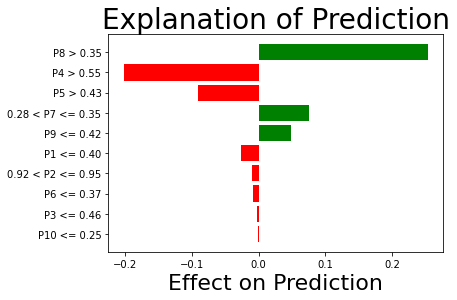

In [95]:
# Display the predicted and true value for the correct instance
print('Prediction: %0.4f' % model.predict(right.reshape(1, -1)))
print (model.predict_proba(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for correct prediction
right_exp = explainer.explain_instance(right, model.predict_proba, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

plt.savefig("featureImp2.JPEG", dpi=400, transparent=True, bbox_inches='tight')

In [96]:
right_exp.show_in_notebook(show_predicted_value=False)


THERE IS ONLY ONE SAMPLE WHICH IS DEFINITELY THE WORST PREDICTION

In [97]:
len(residuals[residuals == np.amax(residuals)])

2

AND PLENTY OF "BEST" PREDICTIONS

In [98]:
len(residuals[residuals == np.amin(residuals)])

6034

The results of feature importance analysis may vary on different "best predictions"!

In [99]:
import warnings
from lime import submodular_pick
import time

explanations_to_return = 10 # the nubmer of explanation to plot graphs
samples_to_use = 5000 # the total number of equations analysed

start = time.time()
sp_obj = submodular_pick.SubmodularPick(explainer, X_train, model.predict_proba, method = "sample", sample_size=samples_to_use, num_features=10, num_exps_desired=explanations_to_return)
end = time.time()
print(str(end - start) + " seconds ellapsed")

2856.4528501033783 seconds ellapsed


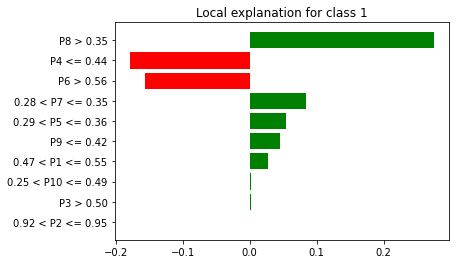

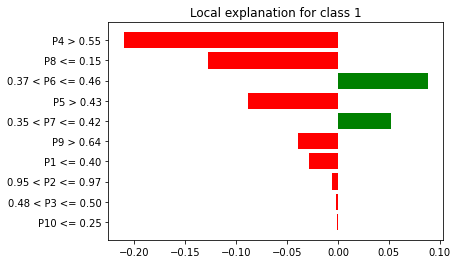

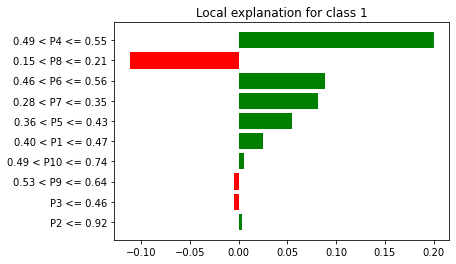

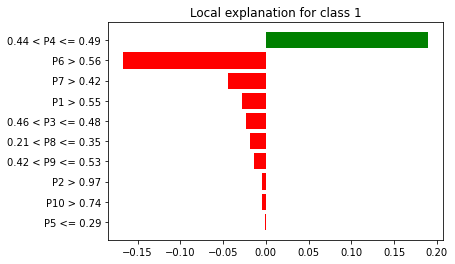

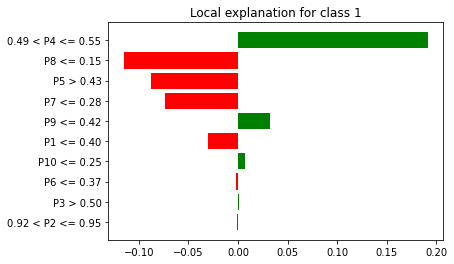

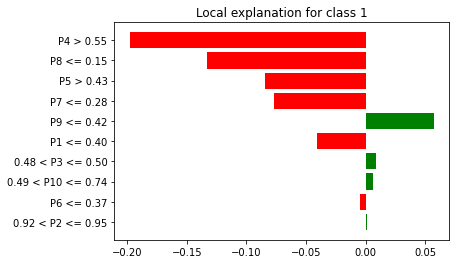

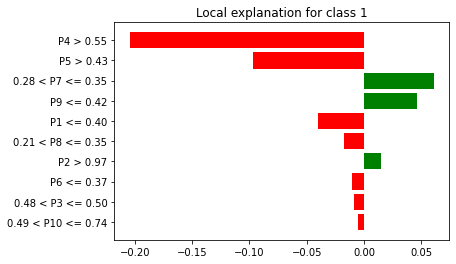

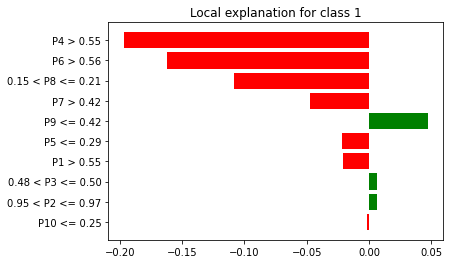

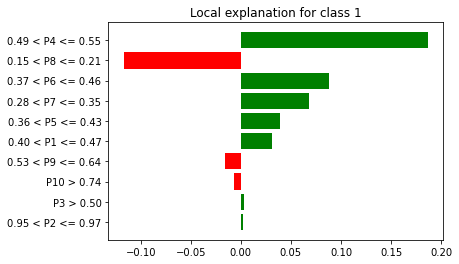

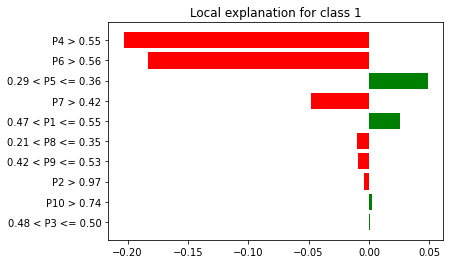

In [100]:
# displaying only some of the explanation

[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [101]:
import re
feature_imps = {}

place = 0 # the most important features

for i in range(samples_to_use):
  key = re.findall("P\d+", sp_obj.explanations[i].as_list()[place][0])[0]
  if key not in feature_imps:
    feature_imps.setdefault(key, [])
  feature_imps[key].append(abs(sp_obj.explanations[i].as_list()[place][1]))

In [102]:
print(feature_imps) # feature_imps contains all features which were the most important among samples_to_use explanations
# every feature corresponds to an array of importances

{'P8': [0.27308290991624495, 0.24618001071384962, 0.2671748786228794, 0.2491498574951011, 0.2600512030781254, 0.25746782769623516, 0.2619065443616478, 0.25505864308976156, 0.26005608943804936, 0.2567733507449925, 0.25972772948294626, 0.2623068296973805, 0.26979077807067636, 0.2547201305724604, 0.2637518675987534, 0.2685620873980089, 0.25000670464669406, 0.2560586913561466, 0.2546299803907639, 0.26471855506759173, 0.25532138438076196, 0.2538868544533217, 0.26429508962453996, 0.2621925450231735, 0.2568612577261313, 0.24834948575619728, 0.2554912462652864, 0.2552086803655511, 0.254286993267865, 0.2628136576312862, 0.26433979956467046, 0.2485840361674772, 0.26210227232054895, 0.2500537705263161, 0.2594647500821317, 0.24832083923646692, 0.2695800359482025, 0.26580026001136864, 0.2567010559266415, 0.2602542028335629, 0.25403599572808333, 0.2563685336382663, 0.2615358276181728, 0.266879388793452, 0.2528769530014141, 0.25484935225550687, 0.25893687608431154, 0.2716990416320791, 0.2603820514117

In [103]:
for key in feature_imps.keys():
  print(key) # the name of the feature
  print(np.mean(feature_imps[key])) # the mean value of its importance
  print(np.std(feature_imps[key])) # the standart devation of its importance
  print(str(len(feature_imps[key])/samples_to_use*100) + '%') # the length of the array
  #print() # the frequency of accurance (length of the array / total samples)

P8
0.25925897549131316
0.00683940375745169
24.46%
P4
0.19362614990643306
0.009885517925605195
75.06%
P6
0.18014798162299828
0.0044520275201904245
0.48%


In [119]:
place = 1 # the most important features

feature_imps = {}

for i in range(samples_to_use):
  key = re.findall("P\d+", sp_obj.explanations[i].as_list()[place][0])[0]
  if key not in feature_imps:
    feature_imps.setdefault(key, [])
  feature_imps[key].append(abs(sp_obj.explanations[i].as_list()[place][1]))

In [120]:
print(feature_imps)

{'P4': [0.1751173513391974, 0.19089437676636292, 0.2033891653790903, 0.17792773345445673, 0.20324616408729915, 0.20238291365895553, 0.20830337159194262, 0.2066082408659385, 0.18679581817238936, 0.19272401019129431, 0.20524786369557566, 0.1827447980560184, 0.18610204330700028, 0.18941995438271841, 0.18127719002469433, 0.18712793956820553, 0.18500560314522488, 0.20686790568348, 0.19377333941339966, 0.2060285035137592, 0.20898996196354855, 0.2084200377639659, 0.18824866115108957, 0.20486365307162566, 0.20393282784115022, 0.2010532483938752, 0.1946753390932558, 0.20152638740038595, 0.18663105831325874, 0.17865462866666376, 0.18919704557872527, 0.19447705860678155, 0.20140389319675472, 0.19992446223075883, 0.19888049380173384, 0.19700795719550268, 0.18158514459918726, 0.18846397259091519, 0.21625805542089976, 0.19499120118061802, 0.19401312505102875, 0.1923906679083416, 0.19915661642162255, 0.18374780603251714, 0.21592175054128143, 0.20600134460933406, 0.18849120477596973, 0.178187424836848

In [121]:
for key in feature_imps.keys():
  print(key)
  print(np.mean(feature_imps[key]))
  print(np.std(feature_imps[key]))
  print(str(len(feature_imps[key])/samples_to_use*100) + '%') # the length of the array

P4
0.19453612288304292
0.010432903126657117
24.92%
P8
0.12216639422444685
0.01362643646208
37.5%
P5
0.08932249562907174
0.008717172428377091
5.0%
P6
0.13633002223176238
0.040173812836311995
30.599999999999998%
P7
0.08183543347293458
0.009990860731342146
1.96%
P9
0.0460573984937869
0.0
0.02%


In [107]:
place = 2 # the most important features

feature_imps = {}

for i in range(samples_to_use):
  key = re.findall("P\d+", sp_obj.explanations[i].as_list()[place][0])[0]
  if key not in feature_imps:
    feature_imps.setdefault(key, [])
  feature_imps[key].append(abs(sp_obj.explanations[i].as_list()[place][1]))

In [108]:
print(feature_imps)

{'P6': [0.16682602011889955, 0.10026634651628988, 0.07638579697608794, 0.0912675629398413, 0.07982448304570079, 0.08124360068325398, 0.09167672626201452, 0.07539820744616665, 0.08745114818977573, 0.08846977562101285, 0.07362037932175403, 0.0940861066726643, 0.0767787700057125, 0.17363792207073026, 0.08736446847632051, 0.09122707600897845, 0.07627770690364724, 0.0800696736079863, 0.08555194041646536, 0.06869829000164719, 0.08473578235577849, 0.07509267186071777, 0.08601712386629162, 0.09493300649226394, 0.09028521747826235, 0.08588889216897656, 0.08712755602305816, 0.16930546023398987, 0.08637372305281717, 0.0923561816019716, 0.08996163303596483, 0.08438945649464534, 0.07861969124345487, 0.08687310540361626, 0.09893654325515762, 0.09705897323170218, 0.1689777925608405, 0.07496983836016537, 0.0983861509174028, 0.08895084076562765, 0.0847379780861589, 0.09220578517937275, 0.09403221167989784, 0.08533597246413455, 0.081638893360578, 0.16651321588100335, 0.16905919641950315, 0.0793762494105

In [109]:
for key in feature_imps.keys():
  print(key)
  print(np.mean(feature_imps[key]))
  print(np.std(feature_imps[key]))
  print(str(len(feature_imps[key])/samples_to_use*100) + '%') # the length of the array

P6
0.0990946923858098
0.029490801351534243
40.1%
P5
0.08215683259653889
0.01549249047626312
23.76%
P7
0.0686815979642968
0.014550769653668987
21.6%
P8
0.12301024376593404
0.013773293223493119
13.08%
P9
0.05283698409052789
0.006661651815890688
1.06%
P1
0.0428333177113417
0.007580564652865616
0.38%
P4
0.17580890379189767
0.0
0.02%


### Random Forest all features

In [110]:
colnames = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","y"]
numerical_subset = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10"]

#reading the text file (dataset)
data = pd.read_csv('TXID_Dataset_diff_power_and_angle.txt', sep=",", names=colnames, header=None, index_col=False )

data.loc[data['y'] == 2, 'y'] = 0
X_reduced = data[numerical_subset]
y = data["y"]

In [111]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 42, shuffle=True)

In [112]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_reduced_train, y_train)

# N.B. we get probabilities to be in a certain class here, not just the class labels!    
model_pred = np.array(model.predict_proba(X_reduced_test))

In [113]:
y_pred = model.predict(X_reduced_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9896666666666667


### Feature removal

In [114]:
colnames = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","y"]
numerical_subset = ["P4","P7","P8"]

#reading the text file (dataset)
data = pd.read_csv('TXID_Dataset_diff_power_and_angle.txt', sep=",", names=colnames, header=None, index_col=False )

data.loc[data['y'] == 2, 'y'] = 0
X_reduced = data[numerical_subset]
y = data["y"]

In [115]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state = 42, shuffle=True)

In [116]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model.fit(X_reduced_train, y_train)

# N.B. we get probabilities to be in a certain class here, not just the class labels!    
model_pred = np.array(model.predict_proba(X_reduced_test))

In [117]:
y_pred = model.predict(X_reduced_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9862222222222222
